In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import tempmatch as tm
import obspy

import helpers

In [2]:
filelocs = !ls /media/sda/data/robdata/tremors/*.mseed

In [3]:
stream = obspy.read(filelocs[0])
for f in filelocs[1:]:
    stream = stream + obspy.read(f)

In [5]:
stream.merge()

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.02.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.03.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.898000Z | 10.0 Hz, 240304060 samples (masked)
7F.B00.04.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.05.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.06.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.898000Z | 10.0 Hz, 240304060 samples (masked)

In [7]:
stream.write('/media/sda/data/robdata/tremors/alldata.mseed', type='MSEED')

NotImplementedError: Masked array writing is not supported. You can use np.array.filled() to convert the masked array to a normal array.

In [9]:
h1 = stream[0].copy()

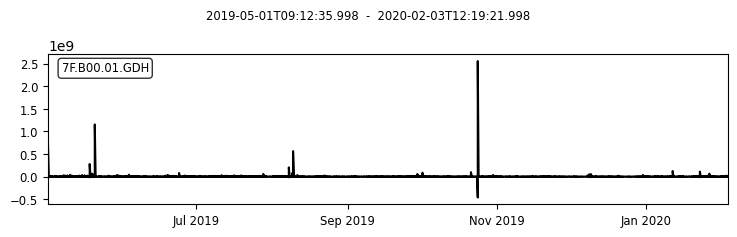

In [12]:
x = h1.plot()

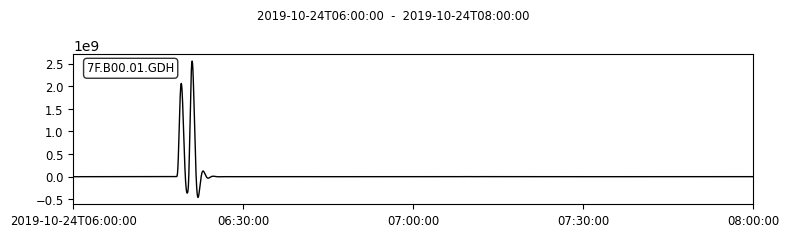

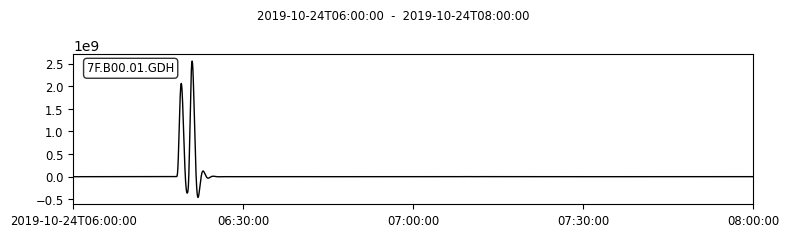

In [131]:
h1.plot(starttime=obspy.UTCDateTime('2019-10-24T06:00:00'), endtime=obspy.UTCDateTime('2019-10-24T08:00:00'))

In [ ]:
y = h1.data
y = y.cumsum()

In [16]:
detectfiles = !ls /media/sda/data/borehole/detections/*.csv

In [19]:

def read_csvs_convert_to_dataframe(csv_paths):
    """
    reads a list of csv file locations and returns them
    as a pandas dataframe
    """
    df = pd.DataFrame()
    for f in csv_paths:
        try:
            df = pd.concat([df, pd.read_csv(f)])
        except:
            pass
        
    return df

bubble = read_csvs_convert_to_dataframe(detectfiles)
bubble['time'] = pd.to_datetime(bubble['time'])
bubble.sort_values(by='time', inplace=True)
bubble['ones'] = 1
bubble.set_index('time', inplace=True)

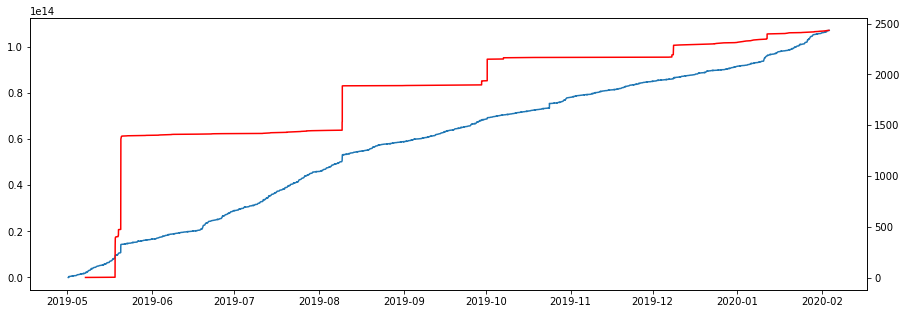

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))

# ax.plot(pd.to_datetime(h1.times()+bubble.index[0].value), y)
ax.plot(h1.times('matplotlib'), y)
# ax.set_yscale('log')

# fig, ax = plt.subplots(figsize=(15, 5))

# df['cumsum'].plot(ax=ax, color='dodgerblue')
ax2 = ax.twinx()
y2 = bubble.ones.cumsum()
x2 = pd.to_datetime(bubble.index)
ax2.plot(x2, y2, color='red')
# ax.set_yscale('log')

In [110]:
stream

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.02.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.03.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.898000Z | 10.0 Hz, 240304060 samples (masked)
7F.B00.04.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.05.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.06.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.898000Z | 10.0 Hz, 240304060 samples (masked)

In [111]:
import scipy.signal as signal

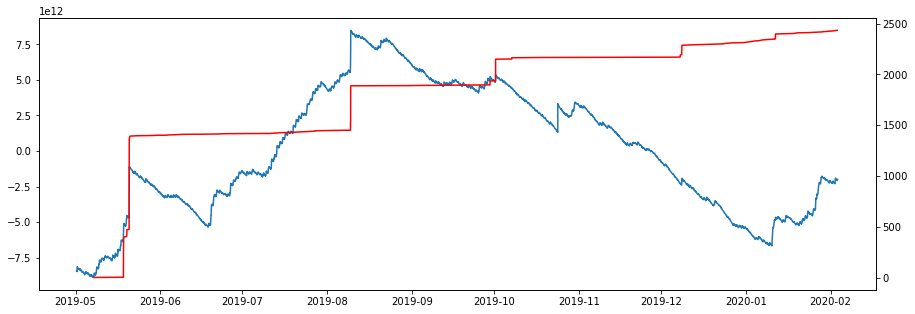

In [112]:
fig, ax = plt.subplots(figsize=(15, 5))

# ax.plot(pd.to_datetime(h1.times()+bubble.index[0].value), y)
ax.plot(h1.times('matplotlib'), signal.detrend(y))
# ax.set_yscale('log')

# fig, ax = plt.subplots(figsize=(15, 5))

# df['cumsum'].plot(ax=ax, color='dodgerblue')
ax2 = ax.twinx()
y2 = bubble.ones.cumsum()
x2 = pd.to_datetime(bubble.index)
ax2.plot(x2, y2, color='red')
# ax.set_yscale('log')

In [132]:
stream

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.02.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.03.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.898000Z | 10.0 Hz, 240304060 samples (masked)
7F.B00.04.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.05.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.998000Z | 10.0 Hz, 240304061 samples (masked)
7F.B00.06.GDH | 2019-05-01T09:12:35.998000Z - 2020-02-03T12:19:21.898000Z | 10.0 Hz, 240304060 samples (masked)

In [ ]:
fig, ax = plt. subplots(figsize=(15, 5))

for n, tr in enumerate(stream):
    
    t = tr.times('matplotlib')
    y = tr.data.cumsum()
    
    ax.plot(y, t, label='h{n}'.format(n=n))
    
ax.legend()
fig.savefig('plots.pdf', bbox_inches='tight')
plt.close()
print('i finished your figure for you')

In [97]:
# h1.stats

         network: 7F
         station: B00
        location: 01
         channel: GDH
       starttime: 2019-05-01T09:12:35.998000Z
         endtime: 2020-02-03T12:19:21.998000Z
   sampling_rate: 10.0
           delta: 0.1
            npts: 240304061
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1055, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 25927680})

In [91]:
# h1.times()

masked_array(data = [0.0 0.1 0.2 ..., 24030405.8 24030405.9 24030406.0],
             mask = [False False False ..., False False False],
       fill_value = 1e+20)

In [55]:
# pd.to_datetime(h1.times()+bubble.index[0].value)

DatetimeIndex(['2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               '2019-05-07 16:37:35.302000896',
               ...
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360',
               '2019-05-07 16:37:35.326031360'],
              dtype=

In [73]:
# pd.to_datetime(h1.times()[-1], unit='ms')

Timestamp('1970-01-01 06:40:30.406000')

In [92]:
# bubble.index[0]

Timestamp('2019-05-07 16:37:35.302001+0000', tz='UTC')

In [96]:
# pd.to_datetime(h1.times()[-1]+1557247055000000000, origin='unix', unit='ns')

Timestamp('2019-05-07 16:37:35.024030464')